In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cardekho_data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df.drop('Car_Name',axis=1,inplace=True)

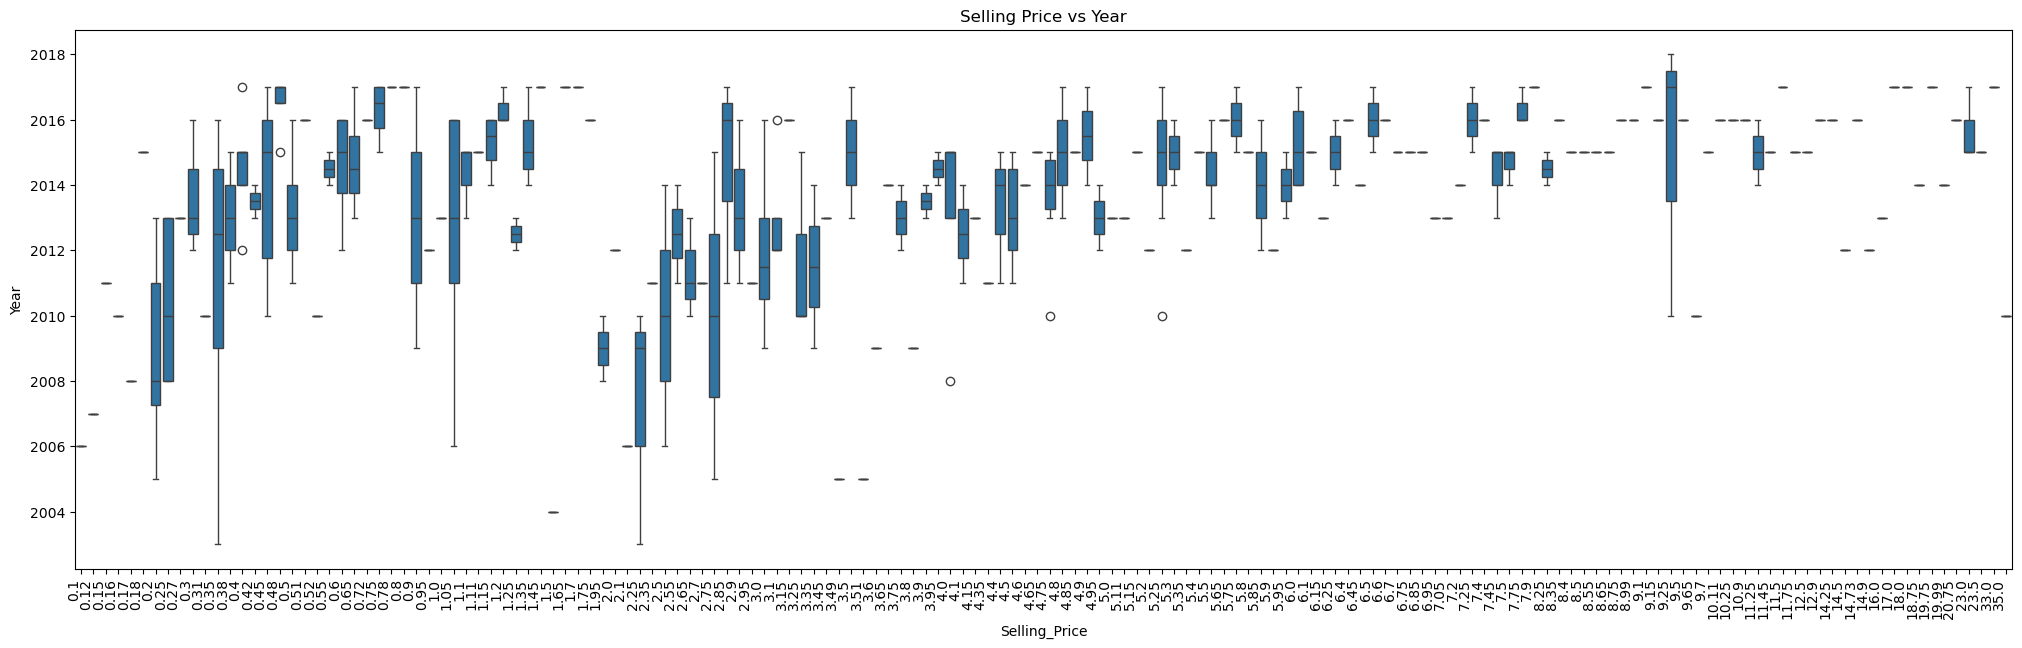

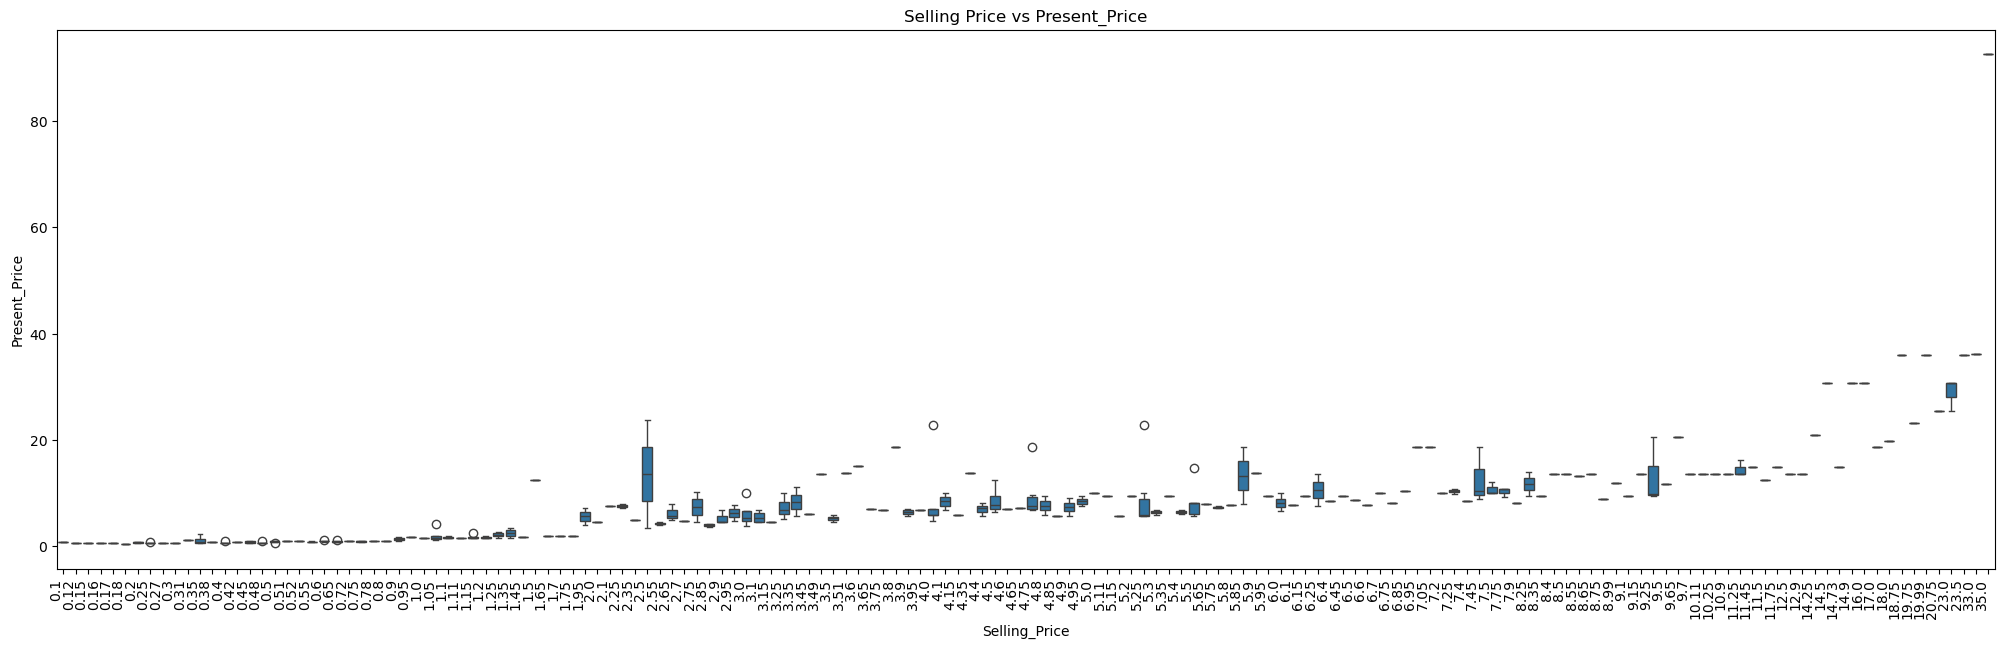

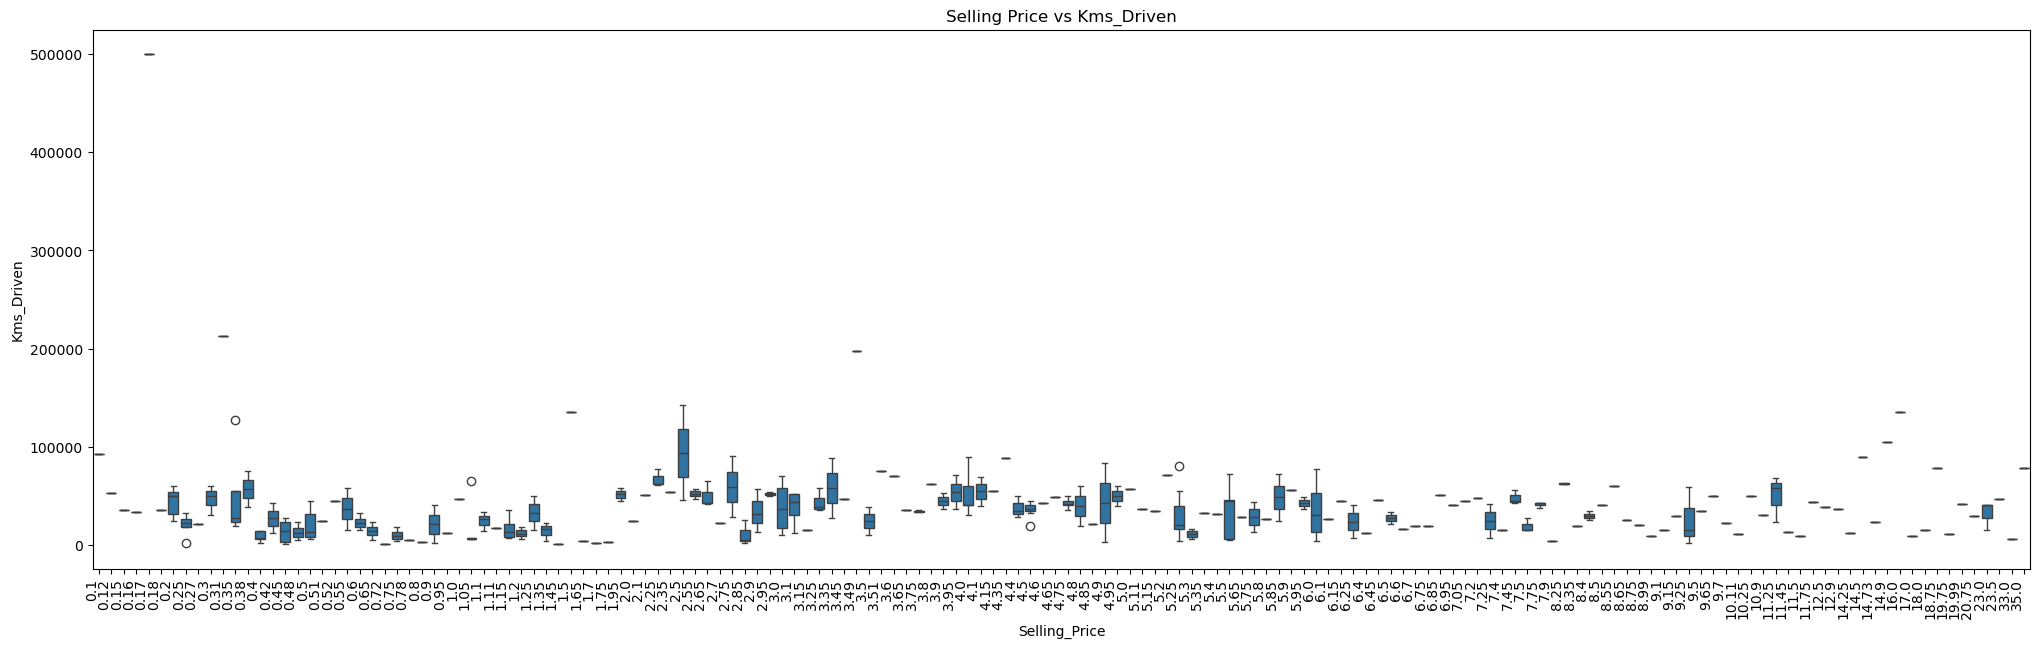

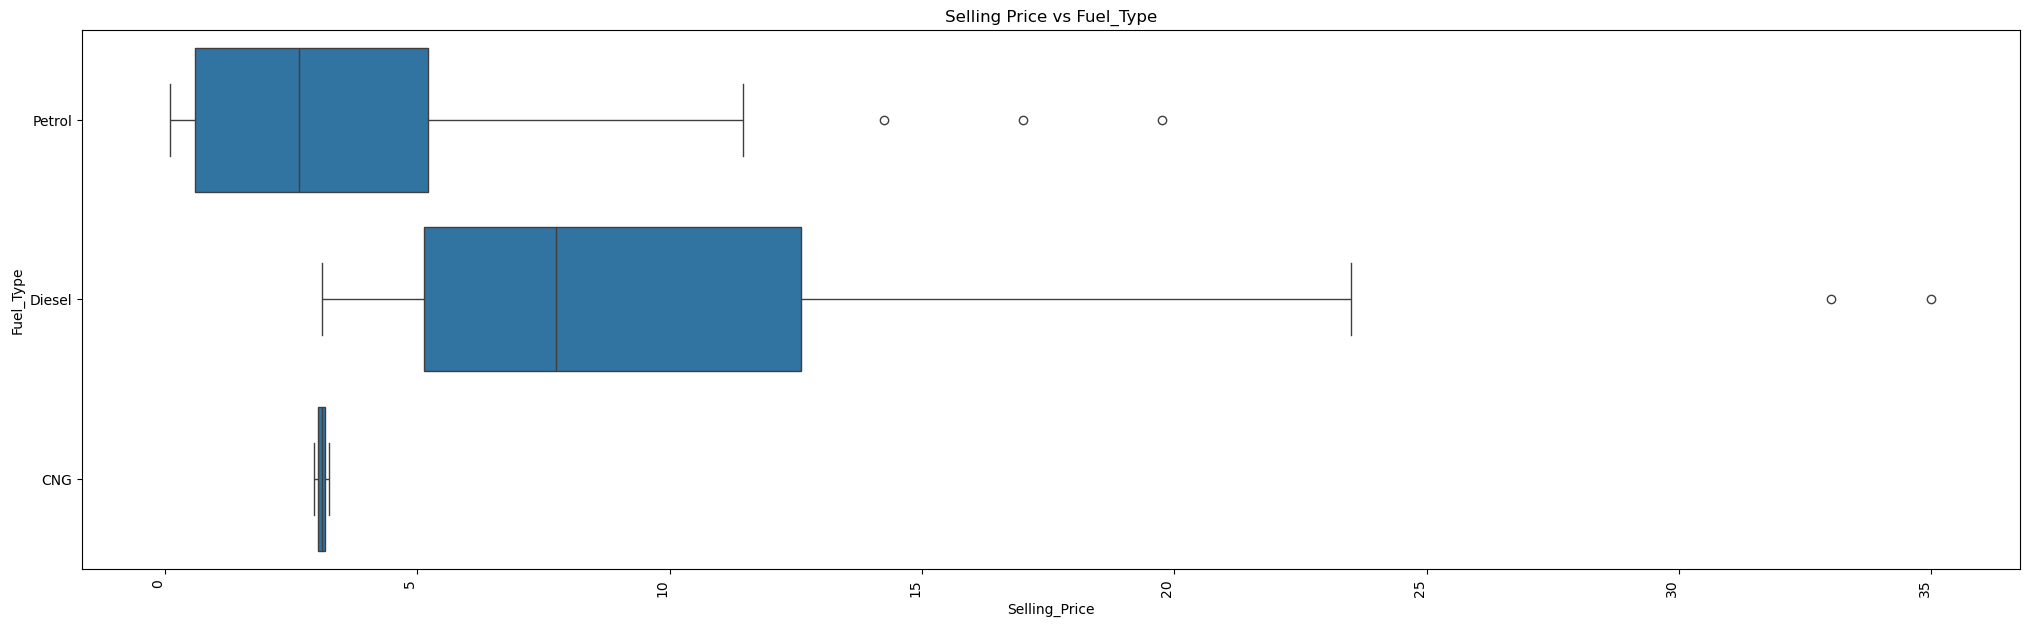

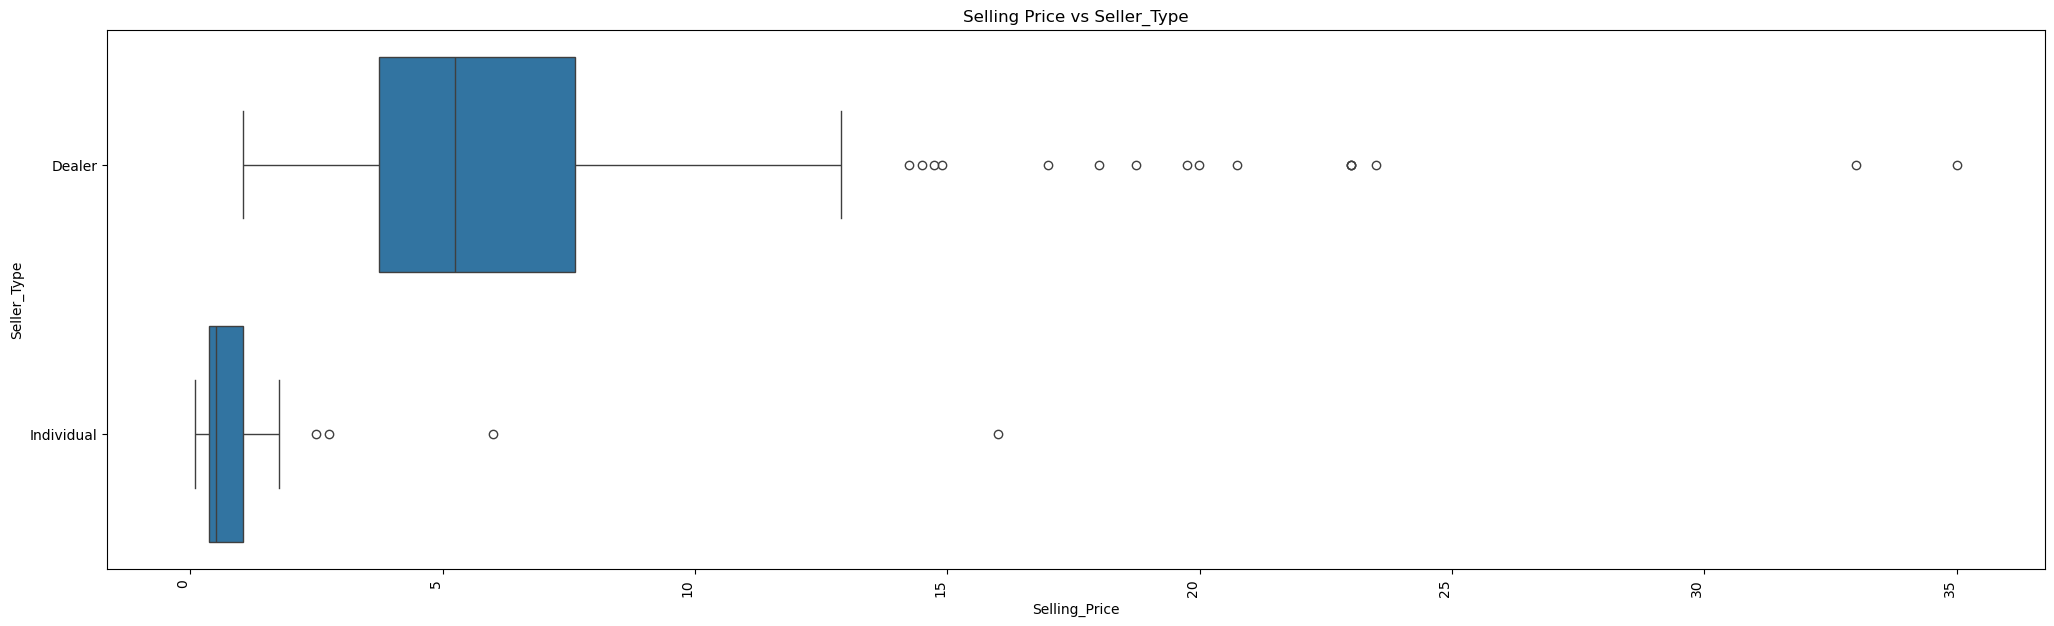

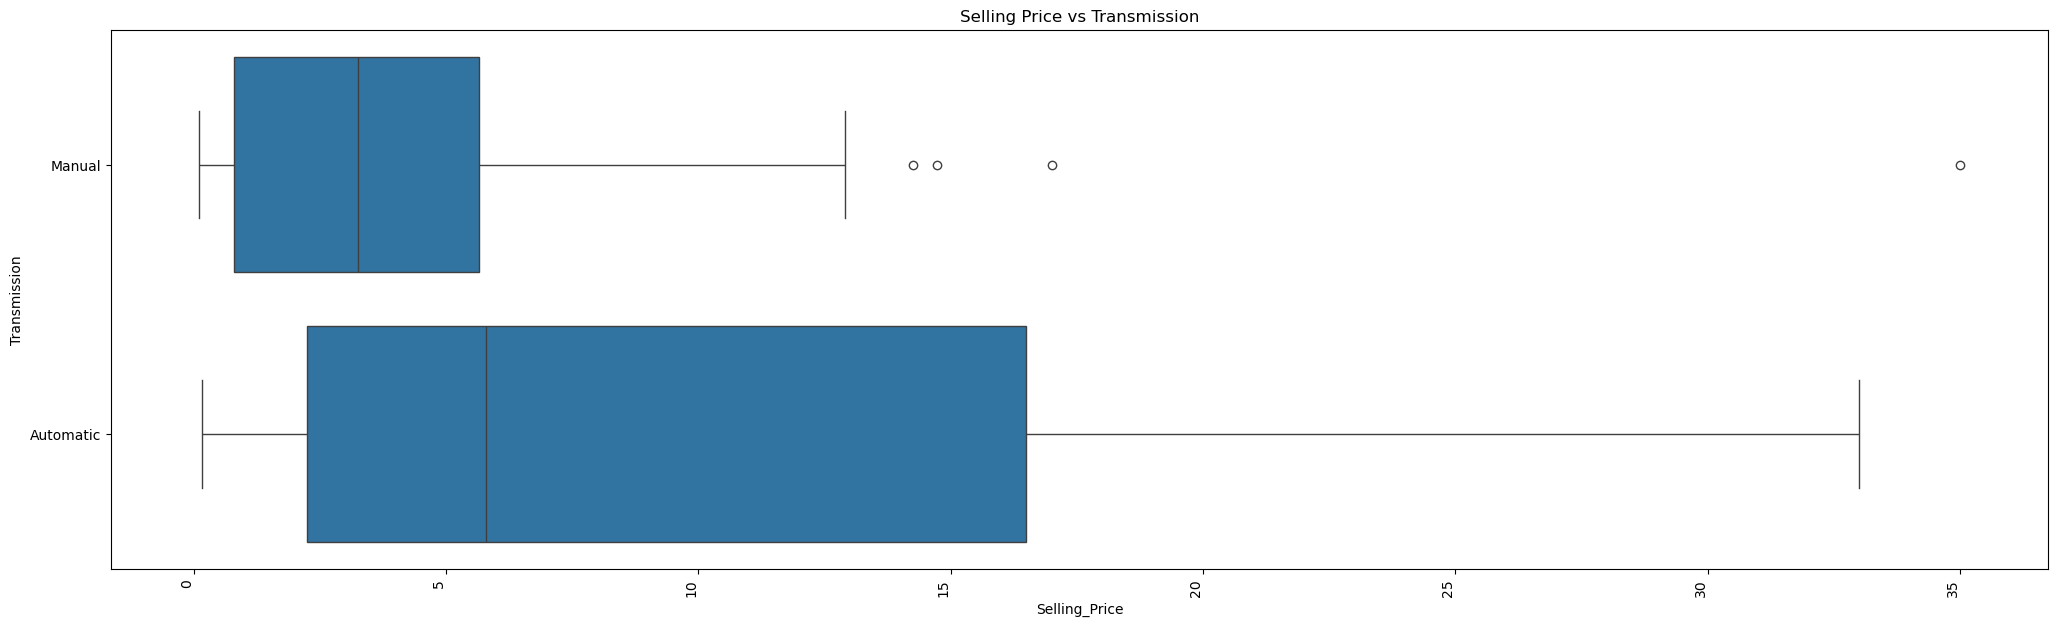

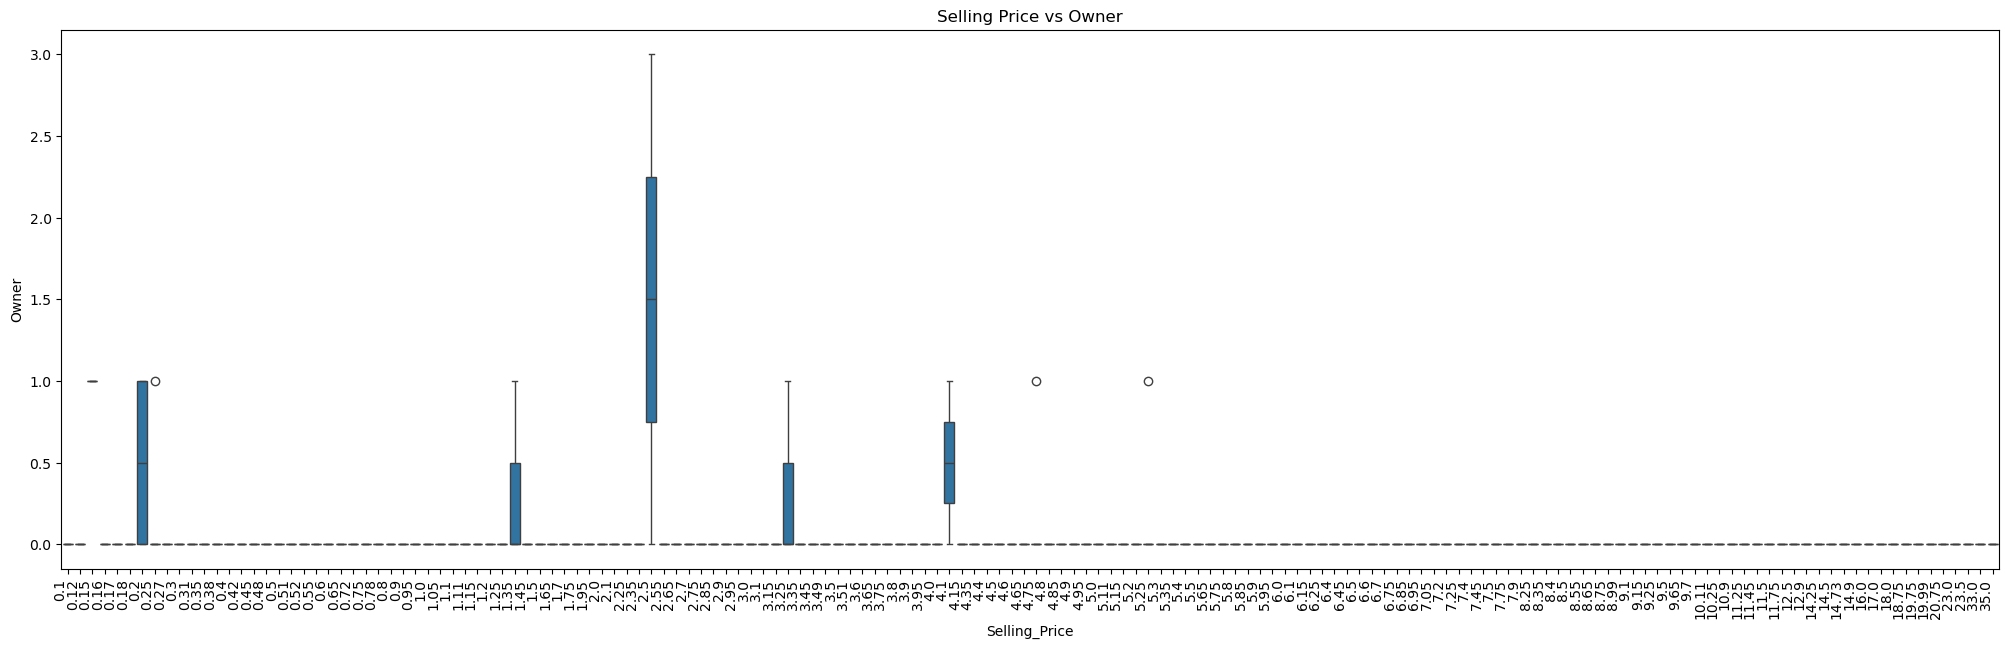

In [18]:
for col in df.columns:
    if col != "Selling_Price":
        plt.figure(figsize=(25,7))
        sns.boxplot(data=df,x="Selling_Price", y=col)
        plt.xticks(rotation=90, ha='right')
        plt.title(f"Selling Price vs {col}")
        plt.show()

In [19]:
num_col = ['Year','Selling_Price','Present_Price','Kms_Driven','Owner']

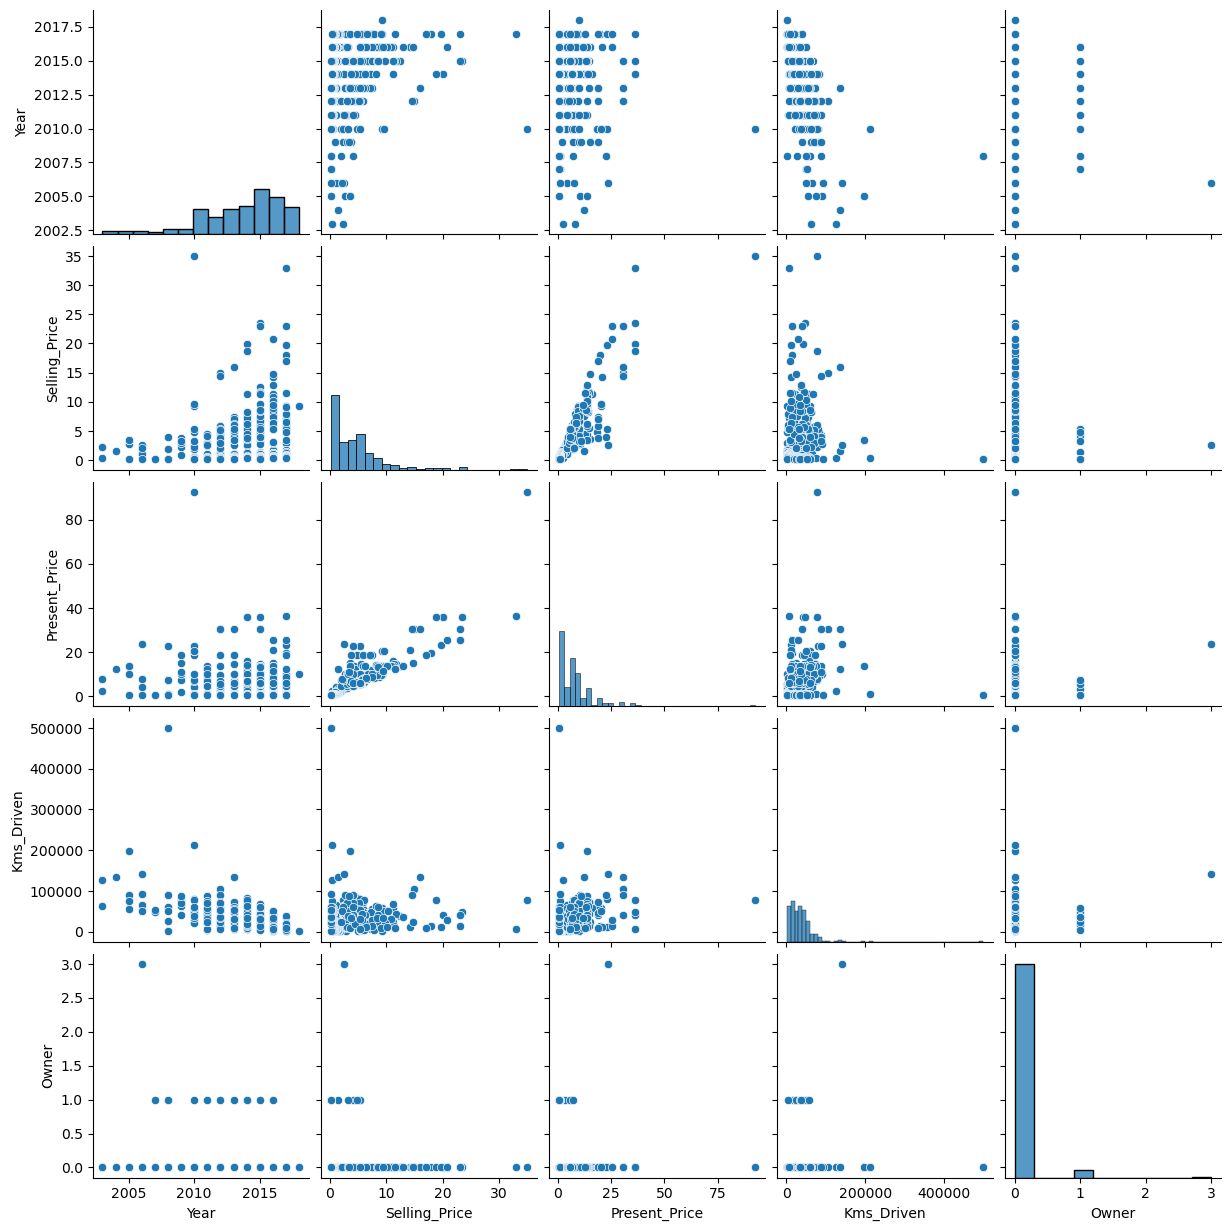

In [20]:
sns.pairplot(df[num_col])

<Axes: >

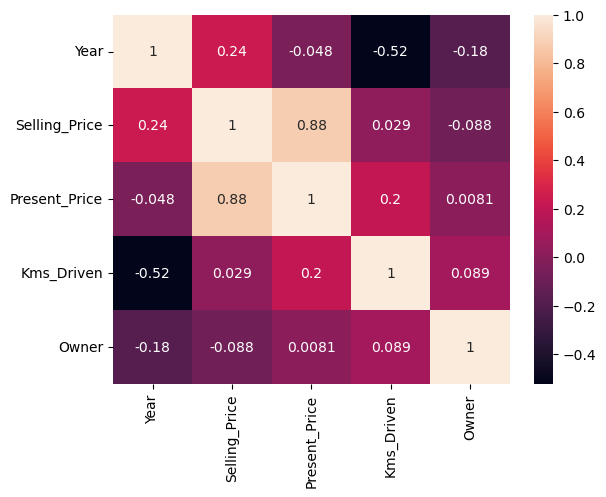

In [21]:
sns.heatmap(df[num_col].corr(),annot=True)

In [22]:
cat_col = ['Fuel_Type','Seller_Type','Transmission']

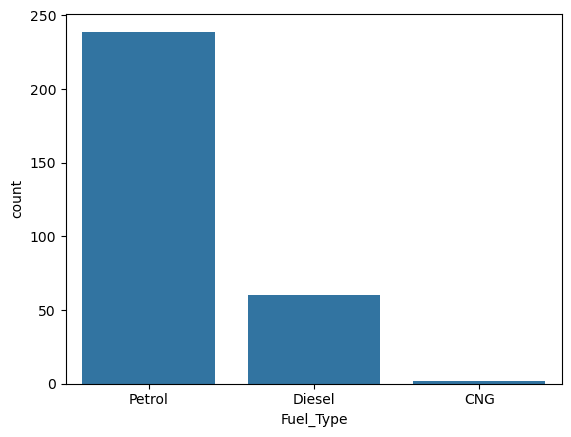

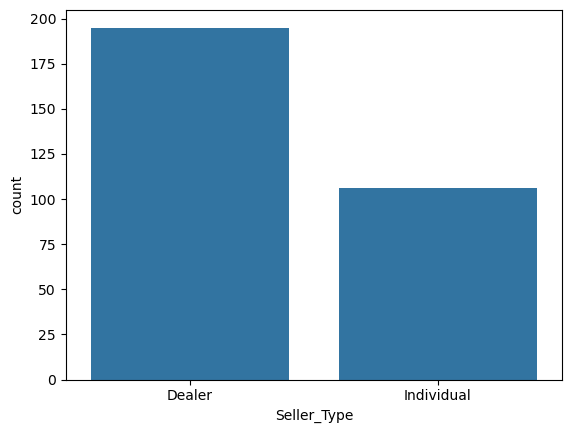

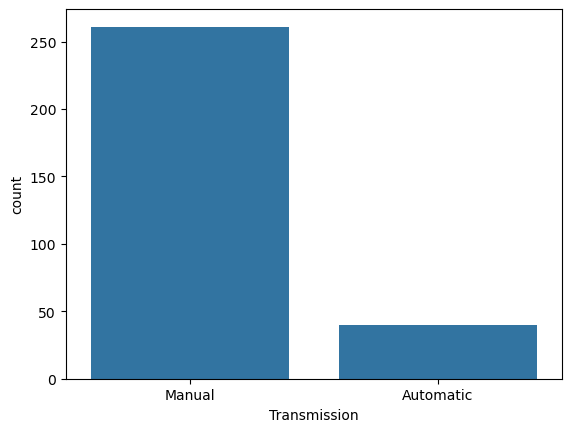

In [23]:
for i in  cat_col:
    sns.countplot(x=i,data=df)
    plt.show()

In [24]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label = LabelEncoder()

In [28]:
for i in df.select_dtypes(include=['object']).columns:
    df[i]  = label.fit_transform(df[i])

In [29]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [30]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [31]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [34]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test,y_pred)

0.9616981508899042

In [38]:
param = {
    "n_estimators" : [100,200,300,400,500],
    "max_depth" : [None,5,10,15,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [39]:
random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [40]:
random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [41]:
random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [42]:
estimators = random.best_estimator_

In [43]:
y_best = estimators.predict(X_test)

In [44]:
r2_score(y_test,y_best)

0.9635303390155866

In [45]:
r2_score(y_test,y_pred)

0.9616981508899042

In [46]:

import joblib

joblib.dump(model, "model.pkl")

['model.pkl']